## Visualization_Practice (Titanic):

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [109]:
titanic = pd.read_excel('titanic.xls')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [110]:
titanic = pd.DataFrame(titanic)

## Q1: How is age distributed in every pclass?

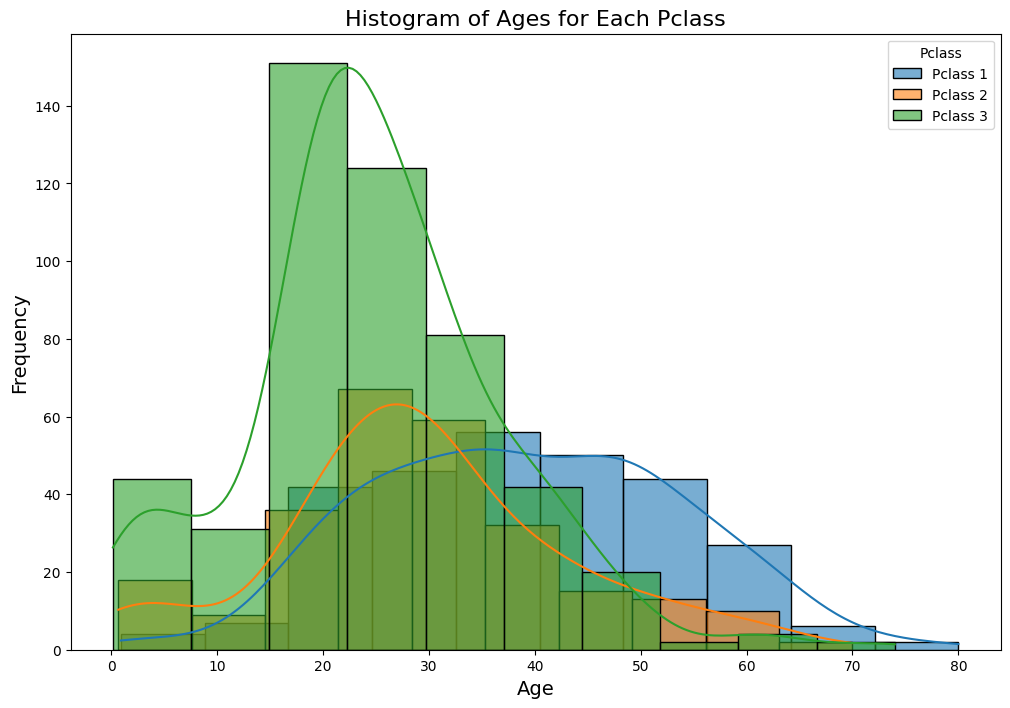

In [7]:
# Create histograms for each pclass
plt.figure(figsize=(12, 8))
for pclass in sorted(titanic["pclass"].unique()):
    sns.histplot(data=titanic[titanic["pclass"] == pclass], x="age", kde=True, bins=10, label=f"Pclass {pclass}",alpha=0.6)
plt.legend(title="Pclass")
plt.title("Histogram of Ages for Each Pclass", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

## Q2: Which family had lost the most members

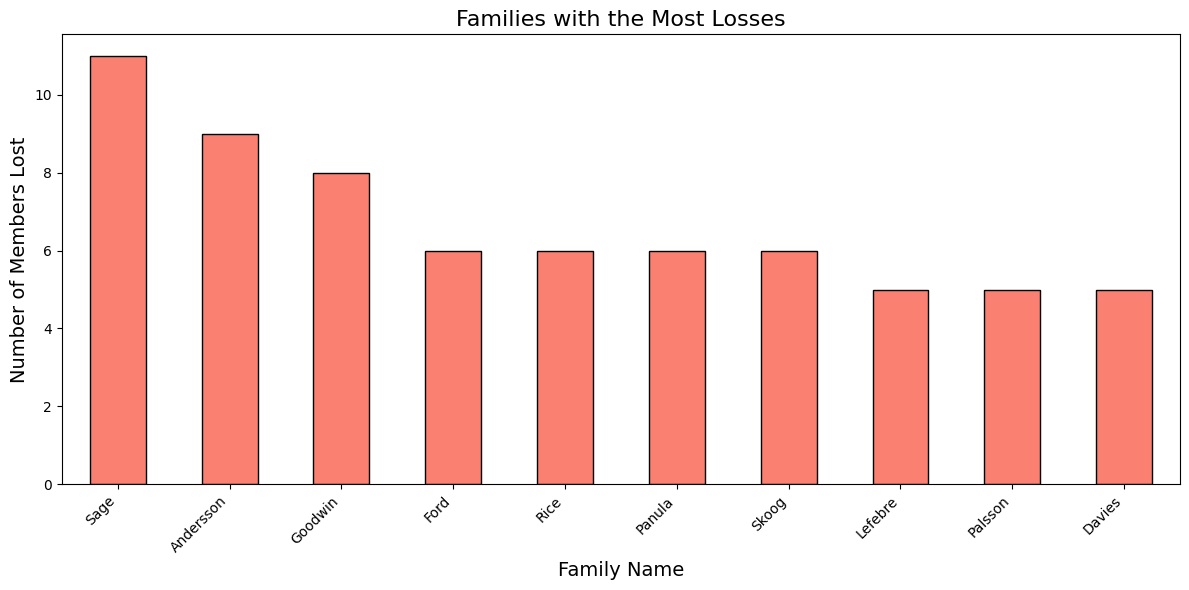

In [8]:
titanic["family_name"] = titanic["name"].apply(lambda x: x.split(",")[0])
family_losses = titanic[titanic["survived"] == 0].groupby("family_name").size().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
family_losses.head(10).plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Families with the Most Losses", fontsize=16)
plt.xlabel("Family Name", fontsize=14)
plt.ylabel("Number of Members Lost", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Q3: Is there a connection between the age of a passenger and it's chance of survival? What about his pclass

1. Create HeatMap with correletions and take into account pclass

<ipython-input-13-ce5e57b3bbe8>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = (titanic.groupby(["age_bin", "pclass"])["survived"].mean().unstack(level="pclass").fillna(0))


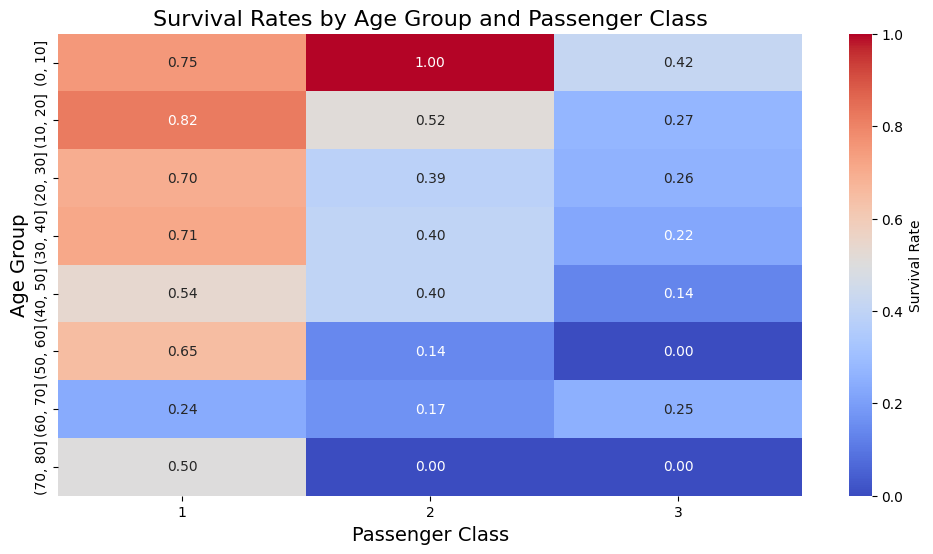

In [13]:
# Create age bins
titanic["age_bin"] = pd.cut(titanic["age"], bins=np.arange(0, 81, 10))
# Calculate survival rates for each age bin
heatmap_data = (titanic.groupby(["age_bin", "pclass"])["survived"].mean().unstack(level="pclass").fillna(0))
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"label": "Survival Rate"})
plt.title("Survival Rates by Age Group and Passenger Class", fontsize=16)
plt.xlabel("Passenger Class", fontsize=14)
plt.ylabel("Age Group", fontsize=14)
plt.show()

2. Count how much survived and not survived in each group category and in each pclass seperetly

<ipython-input-20-2ffd6a5312e8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_pclass_bins = titanic.groupby(['age_bin', 'pclass'])


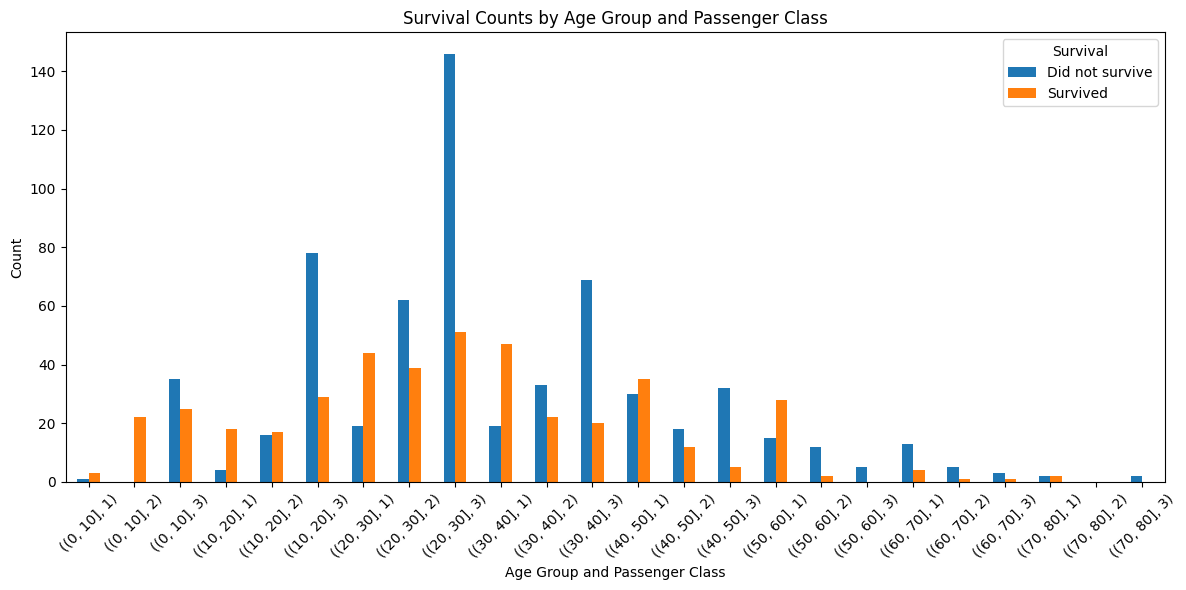

In [20]:
# Group by 'age_bin' and 'pclass' to calculate survival counts
age_pclass_bins = titanic.groupby(['age_bin', 'pclass'])
# Get the survival counts for each combination of 'age_bin' and 'pclass'
survived_counts = age_pclass_bins['survived'].value_counts().unstack(fill_value=0)
# Plot the survival counts for each age group and pclass
survived_counts.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Survival Counts by Age Group and Passenger Class')
plt.xlabel('Age Group and Passenger Class')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'], title='Survival')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Q4: What is the relation between survivors to deceased in every pclass

survived  survivor_to_deceased_ratio
pclass                              
1                           1.626016
2                           0.753165
3                           0.342803


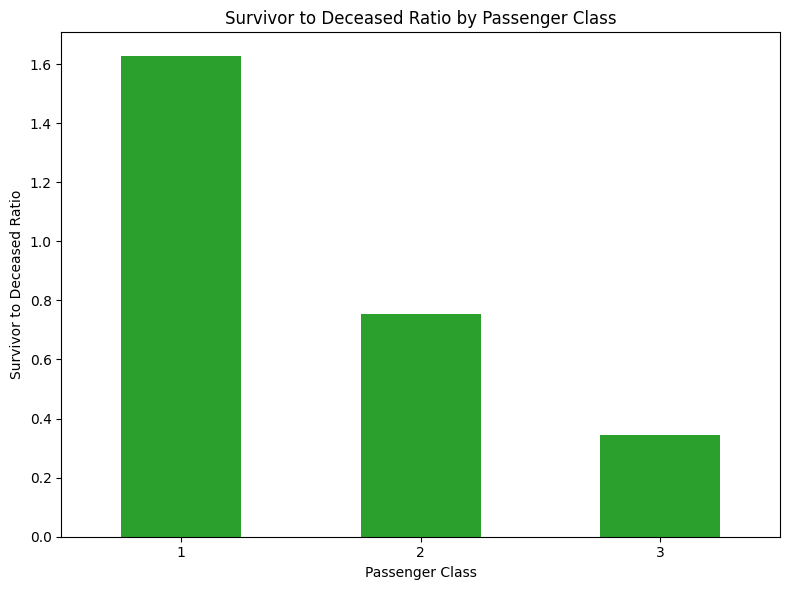

In [22]:
survival_counts_by_pclass = titanic.groupby('pclass')['survived'].value_counts().unstack(fill_value=0)
survival_counts_by_pclass['survivor_to_deceased_ratio'] = (survival_counts_by_pclass[1] / survival_counts_by_pclass[0])
print(survival_counts_by_pclass[['survivor_to_deceased_ratio']])
survival_counts_by_pclass['survivor_to_deceased_ratio'].plot(kind='bar', color='tab:green', figsize=(8, 6))
plt.title('Survivor to Deceased Ratio by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survivor to Deceased Ratio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Q5: Distribution of Sex in each pclass

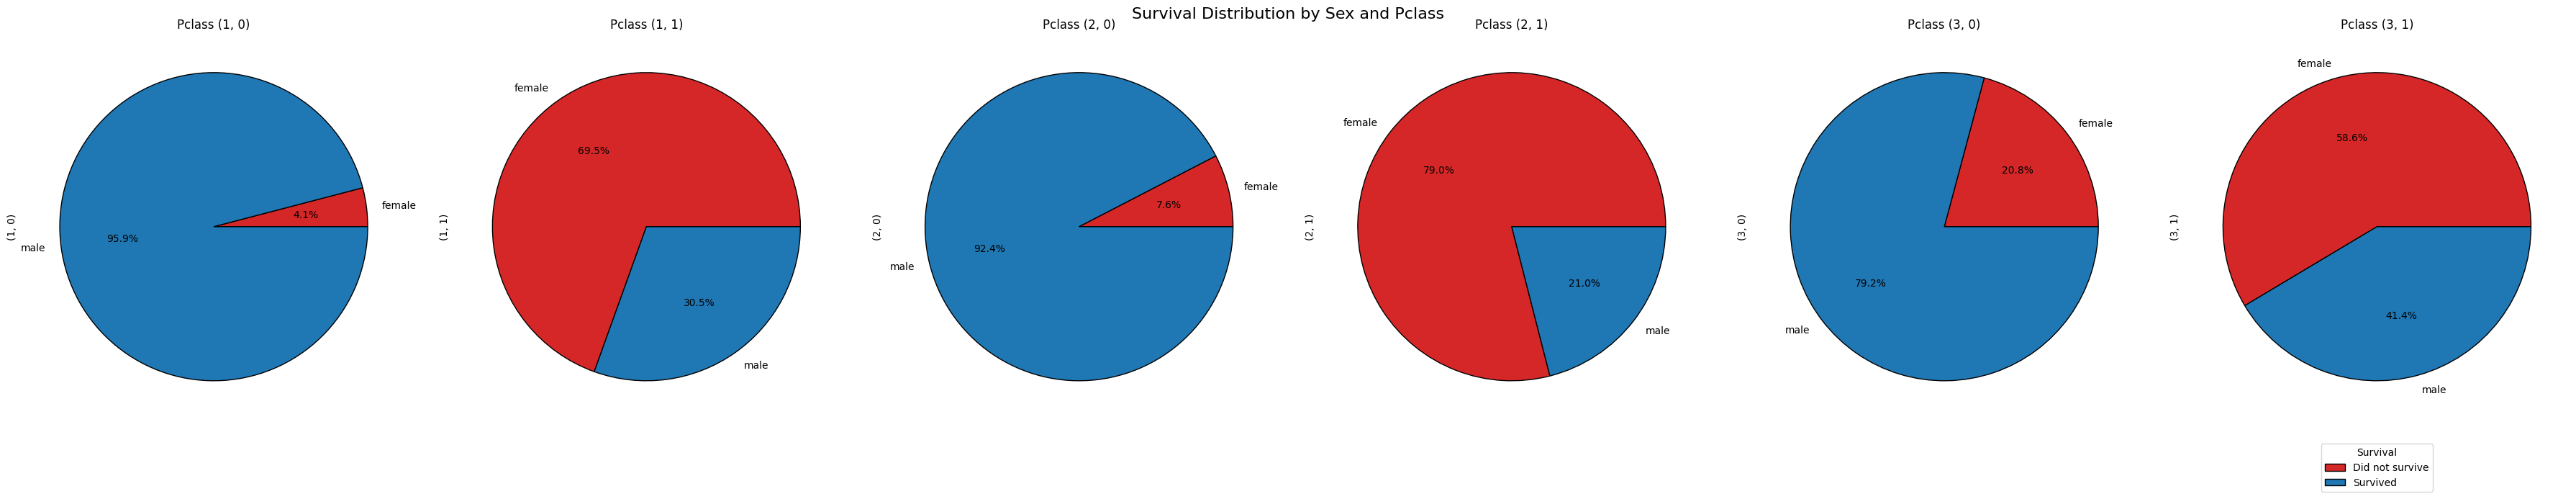

In [26]:
grouped_by_survived_sex_pclass = titanic.groupby(['pclass', 'survived', 'sex']).size().unstack(fill_value=0)
pclasses = grouped_by_survived_sex_pclass.index
fig, axes = plt.subplots(1, len(pclasses), figsize=(6 * len(pclasses), 6))
for i, pclass in enumerate(pclasses):
    sex_count = grouped_by_survived_sex_pclass.loc[pclass]
    sex_count.plot(kind='pie', ax=axes[i], autopct='%1.1f%%', colors=['tab:red', 'tab:blue'],
                   legend=False, title=f'Pclass {pclass}', wedgeprops={'edgecolor': 'black'})
plt.suptitle('Survival Distribution by Sex and Pclass', fontsize=16)
plt.tight_layout()
plt.legend(['Did not survive', 'Survived'], title='Survival', loc='upper center', bbox_to_anchor=(0.5, -0.05))
plt.show()

## Q6: Correlation between survivals and source station

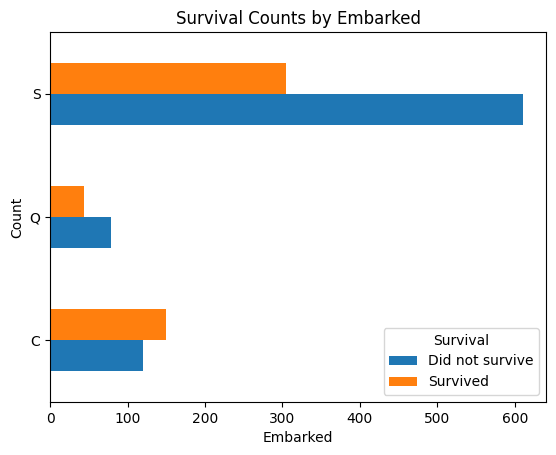

In [27]:
group_by_embarked = titanic.groupby('embarked')
survived_counts = group_by_embarked['survived'].value_counts().unstack()
survived_counts.plot(kind='barh', stacked=False)
plt.title('Survival Counts by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'], title='Survival')
plt.show()

## I did all the visualizations and now I predict titanic survival people:


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [111]:
# Data Preprocessing
imputer_age = SimpleImputer(strategy='mean')
titanic['age'] = imputer_age.fit_transform(titanic[['age']])
fare_imputer = SimpleImputer(strategy='mean')
titanic['fare'] = fare_imputer.fit_transform(titanic[['fare']])
titanic['embarked'] = titanic['embarked'].fillna('S')
titanic["age_bin"] = pd.cut(titanic["age"], bins=np.arange(0, 81, 10))
age_bin_mapping = {bin: idx + 1 for idx, bin in enumerate(titanic['age_bin'].unique())}
titanic["age_bin"] = titanic['age_bin'].map(age_bin_mapping)

# Drop irrelevant columns
titanic = titanic.drop(columns=['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest','sibsp','parch','age'])
titanic

,pclass,survived,sex,fare,embarked,age_bin
0,1,1,female,211.3375,S,1
1,1,1,male,151.5500,S,2
2,1,0,female,151.5500,S,2
3,1,0,male,151.5500,S,1
4,1,0,female,151.5500,S,1
...,...,...,...,...,...,...
1304,3,0,female,14.4542,C,8
1305,3,0,female,14.4542,C,1
1306,3,0,male,7.2250,C,1
1307,3,0,male,7.2250,C,1


In [112]:
sex_dummies = pd.get_dummies(titanic['sex'], prefix='sex').astype(int)
titanic = pd.concat([titanic, sex_dummies], axis=1)
titanic.drop(columns=['sex'], inplace=True)
titanic

,pclass,survived,fare,embarked,age_bin,sex_female,sex_male
0,1,1,211.3375,S,1,1,0
1,1,1,151.5500,S,2,0,1
2,1,0,151.5500,S,2,1,0
3,1,0,151.5500,S,1,0,1
4,1,0,151.5500,S,1,1,0
...,...,...,...,...,...,...,...
1304,3,0,14.4542,C,8,1,0
1305,3,0,14.4542,C,1,1,0
1306,3,0,7.2250,C,1,0,1
1307,3,0,7.2250,C,1,0,1


In [113]:
emb_dummies = pd.get_dummies(titanic['embarked'], prefix='embarked').astype(int)
titanic = pd.concat([titanic, emb_dummies], axis=1)
titanic.drop(columns=['embarked'], inplace=True)
titanic

,pclass,survived,fare,age_bin,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,211.3375,1,1,0,0,0,1
1,1,1,151.5500,2,0,1,0,0,1
2,1,0,151.5500,2,1,0,0,0,1
3,1,0,151.5500,1,0,1,0,0,1
4,1,0,151.5500,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3,0,14.4542,8,1,0,1,0,0
1305,3,0,14.4542,1,1,0,1,0,0
1306,3,0,7.2250,1,0,1,1,0,0
1307,3,0,7.2250,1,0,1,1,0,0


In [107]:
titanic['age'] = np.ceil(titanic['age']).astype(int)
titanic

,pclass,survived,age,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29,211.3375,1,0,0,0,1
1,1,1,1,151.5500,0,1,0,0,1
2,1,0,2,151.5500,1,0,0,0,1
3,1,0,30,151.5500,0,1,0,0,1
4,1,0,25,151.5500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3,0,15,14.4542,1,0,1,0,0
1305,3,0,30,14.4542,1,0,1,0,0
1306,3,0,27,7.2250,0,1,1,0,0
1307,3,0,27,7.2250,0,1,1,0,0


In [133]:
# Feature Selection
data = titanic.drop(columns=['survived'])  # Features
tar = titanic['survived']  # Target

# Split into training and testing sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(data, tar, test_size=0.3, random_state=42) ## If test size 10% this is 0.86 accuracy

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=50, learning_rate=0.3, max_depth=9, random_state=42)

# Train the model
X_train = X_train.apply(pd.to_numeric)
X_test = X_test.apply(pd.to_numeric)
xgb_model.fit(X_train, y_train)

# Make predictions on test data
test_pred = xgb_model.predict(X_test)

# Evaluate the model on test data
accuracy = accuracy_score(test_pred, y_test)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, test_pred))

Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       224
           1       0.84      0.75      0.79       169

    accuracy                           0.83       393
   macro avg       0.83      0.82      0.83       393
weighted avg       0.83      0.83      0.83       393

